# <font color='LightBlue' style='font-family:Georgia'> **Island Hoppers​: Optimising Sustainable Transit Policies​**</font>


## <font color='Silver' style='font-family:Georgia'>

> - Kevin Schaaf            (11058688) 
> - Haron Malash            (15179192) 
> - Sanjhana Bhusal         (14724383) 
> - Martijn Messanella      (10760148) 
> - Lisa Pahladsingh        (13846566)

</font>

In [4]:
from Simulate import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import pandas as pd

plt.style.use('default')

# Experiment: Optimising the ferry price and capacity
## Data Collection

In [91]:
def run_simulation(capacity, ferry_base_price, islands, num_days):
    """
    Run the simulation with specisfied parameters.
    """
    simulation = Simulation(
        islands=islands,
        capacity=capacity,
        ferry_base_price=ferry_base_price,
        num_days=num_days
    )
    simulation.run()
    return simulation.return_percentage_ferry_users()



def run_experiment(islands, capacities, ferry_prices, ferry_base_price, num_days, runs):
    # Initiate lists containing the results, mean_of_all_runs, and conficence intervals
    results = np.zeros((len(capacities), len(ferry_prices), num_days, runs))
    mean_of_all_runs = np.zeros((len(capacities), len(ferry_prices), num_days))
    cis_of_all_runs = np.zeros((len(capacities), len(ferry_prices), num_days, 2))

    mean_of_equilibrium = np.zeros((len(capacities), len(ferry_prices)))
    cis_of_equilibrium = np.zeros((len(capacities), len(ferry_prices), 2))

    # Loop over prices and capacities
    for price_index, ferry_base_price in enumerate(ferry_prices):
        for capacity_index, capacity in enumerate(capacities):
            for i in range(runs):
                results[capacity_index, price_index, :, i] = run_simulation(islands=islands, 
                                                                            capacity=capacity, 
                                                                            ferry_base_price=ferry_base_price, 
                                                                            num_days=num_days)


            mean_of_all_runs[capacity_index, price_index] = np.mean(results[capacity_index, price_index], axis=1)
            cis_of_all_runs[capacity_index, price_index] = np.percentile(results[capacity_index, price_index], [2.5, 97.5], axis=1).T

            mean_of_equilibrium[capacity_index, price_index] = np.mean(mean_of_all_runs[capacity_index, price_index, -10:])
            cis_of_equilibrium[capacity_index, price_index] = np.percentile(mean_of_all_runs[capacity_index, price_index, -10:], [2.5, 97.5])

    # Make dataframe
    df_percentages = pd.DataFrame(results.reshape(len(capacities)*len(ferry_prices)*num_days*runs))
    df_mean = pd.DataFrame(mean_of_all_runs.reshape(len(capacities)*len(ferry_prices)*num_days))
    df_CI = pd.DataFrame(cis_of_all_runs.reshape(len(capacities)*len(ferry_prices)*num_days*2))
    df_mean_mean = pd.DataFrame(mean_of_equilibrium.reshape(len(capacities)*len(ferry_prices)))
    df_CI_mean = pd.DataFrame(cis_of_equilibrium.reshape(len(capacities)*len(ferry_prices)*2))

    nr_of_islands = len(islands)
   
    # Create directory if it doesn't exist
    directory_name = f"Data_{nr_of_islands}"
    if not os.path.exists(directory_name):
        os.makedirs(directory_name)

    # Save DataFrames to CSV in the newly created/checked directory
    df_percentages.to_csv(f'{directory_name}/percentages_ferry_users.csv', index=False)
    df_mean.to_csv(f'{directory_name}/mean.csv', index=False)
    df_CI.to_csv(f'{directory_name}/CI.csv', index=False)
    df_mean_mean.to_csv(f'{directory_name}/mean_mean.csv', index=False)
    df_CI_mean.to_csv(f'{directory_name}/CI_mean.csv', index=False)
    
    return results, mean_of_all_runs, cis_of_all_runs, mean_of_equilibrium, cis_of_equilibrium



In [ ]:
def plot_time_series(mean_runs, ci_runs, title, ylabel, xlabel='Time [a.u.]', filename=None):
    """Plots time series data with confidence intervals."""
    plt.figure(dpi=300)
    for ix, (mean, ci) in enumerate(zip(mean_runs, ci_runs)):
        label = f'Capacity {capacities[ix]}' if len(mean_runs) > 1 else 'Single Capacity'
        plt.plot(mean * 100, label=label)
        plt.fill_between(np.arange(len(mean)), ci[:, 0] * 100, ci[:, 1] * 100, alpha=0.5)
    plt.title(title, fontsize=20, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14, fontweight='bold')
    plt.ylabel(ylabel, fontsize=14, fontweight='bold')
    plt.legend()
    if filename:
        plt.savefig(f'Figures/{filename}')
    plt.show()

def plot_against_factors(factors, means, cis, title, xlabel, ylabel, filename=None):
    """Plots means against factors with confidence intervals."""
    plt.figure(dpi=300)
    for ix, mean in enumerate(means):
        plt.plot(factors, mean * 100, label=f'Price {ferry_prices[ix]}')
        plt.fill_between(factors, cis[ix][:, 0] * 100, cis[ix][:, 1] * 100, alpha=0.5)
    plt.title(title, fontsize=20, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14, fontweight='bold')
    plt.ylabel(ylabel, fontsize=14, fontweight='bold')
    plt.legend()
    if filename:
        plt.savefig(f'Figures/{filename}')
    plt.show()

def plot_3d_surface(X, Y, Z, title, xlabel, ylabel, zlabel, filename=None):
    """Creates a 3D surface plot."""
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z * 100, cmap='viridis', edgecolor='none')
    ax.set_xlabel(xlabel, fontsize=14, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=14, fontweight='bold')
    ax.set_zlabel(zlabel, fontsize=14, fontweight='bold')
    ax.set_title(title, fontsize=20, fontweight='bold')
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    if filename:
        plt.savefig(f'Figures/{filename}')
    plt.show()


### Two-Islands

In [102]:
capacities=[1000, 2000]
ferry_prices=[1, 2]

results, mean_of_all_runs, cis_of_all_runs, mean_of_equilibrium, cis_of_equilibrium = run_experiment(
    islands=['A', 'B'],
    capacities=capacities,
    ferry_prices=ferry_prices,
    ferry_base_price=1, 
    num_days=100, 
    runs=1
)

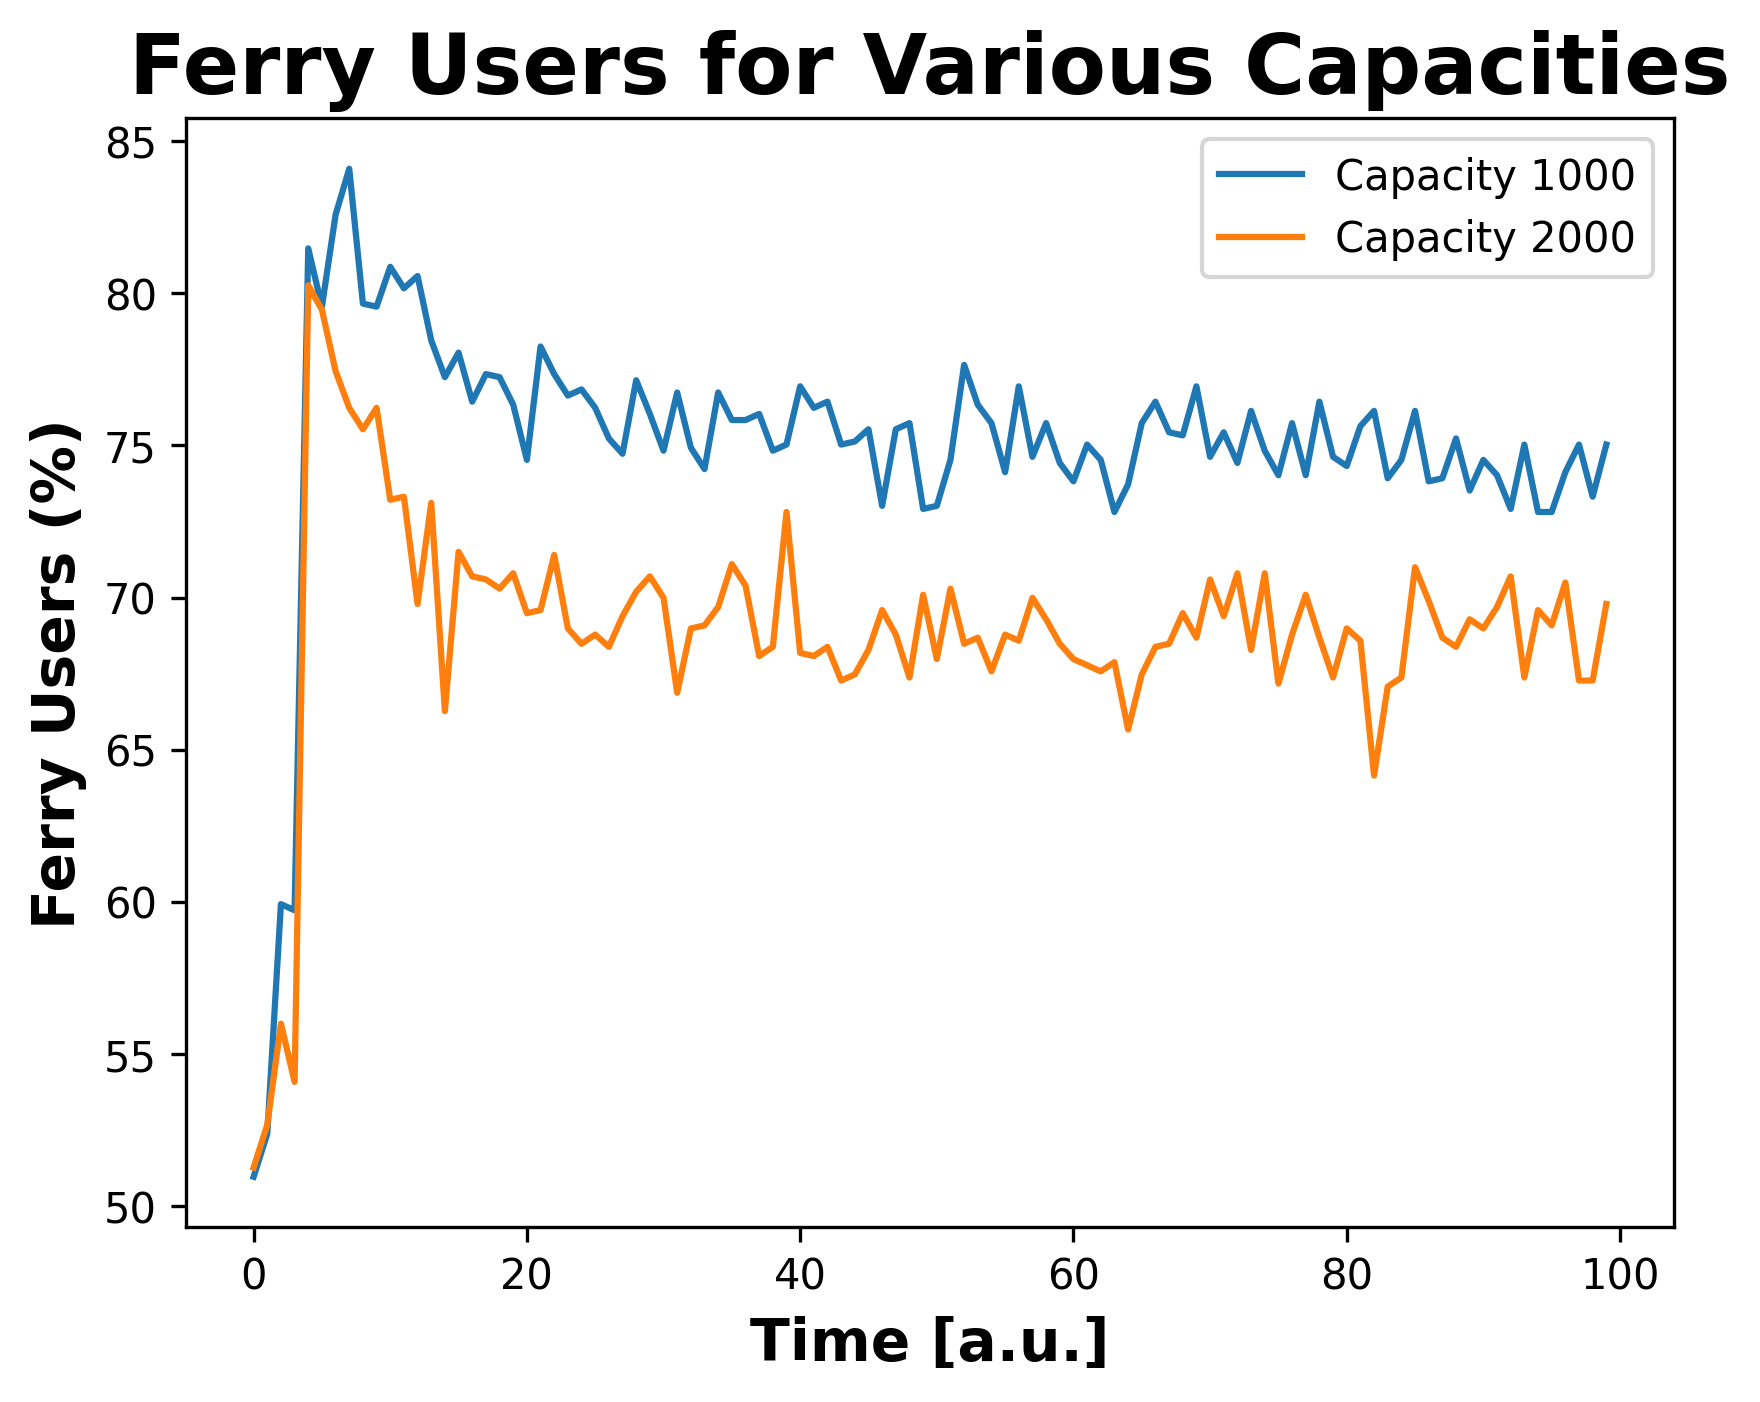

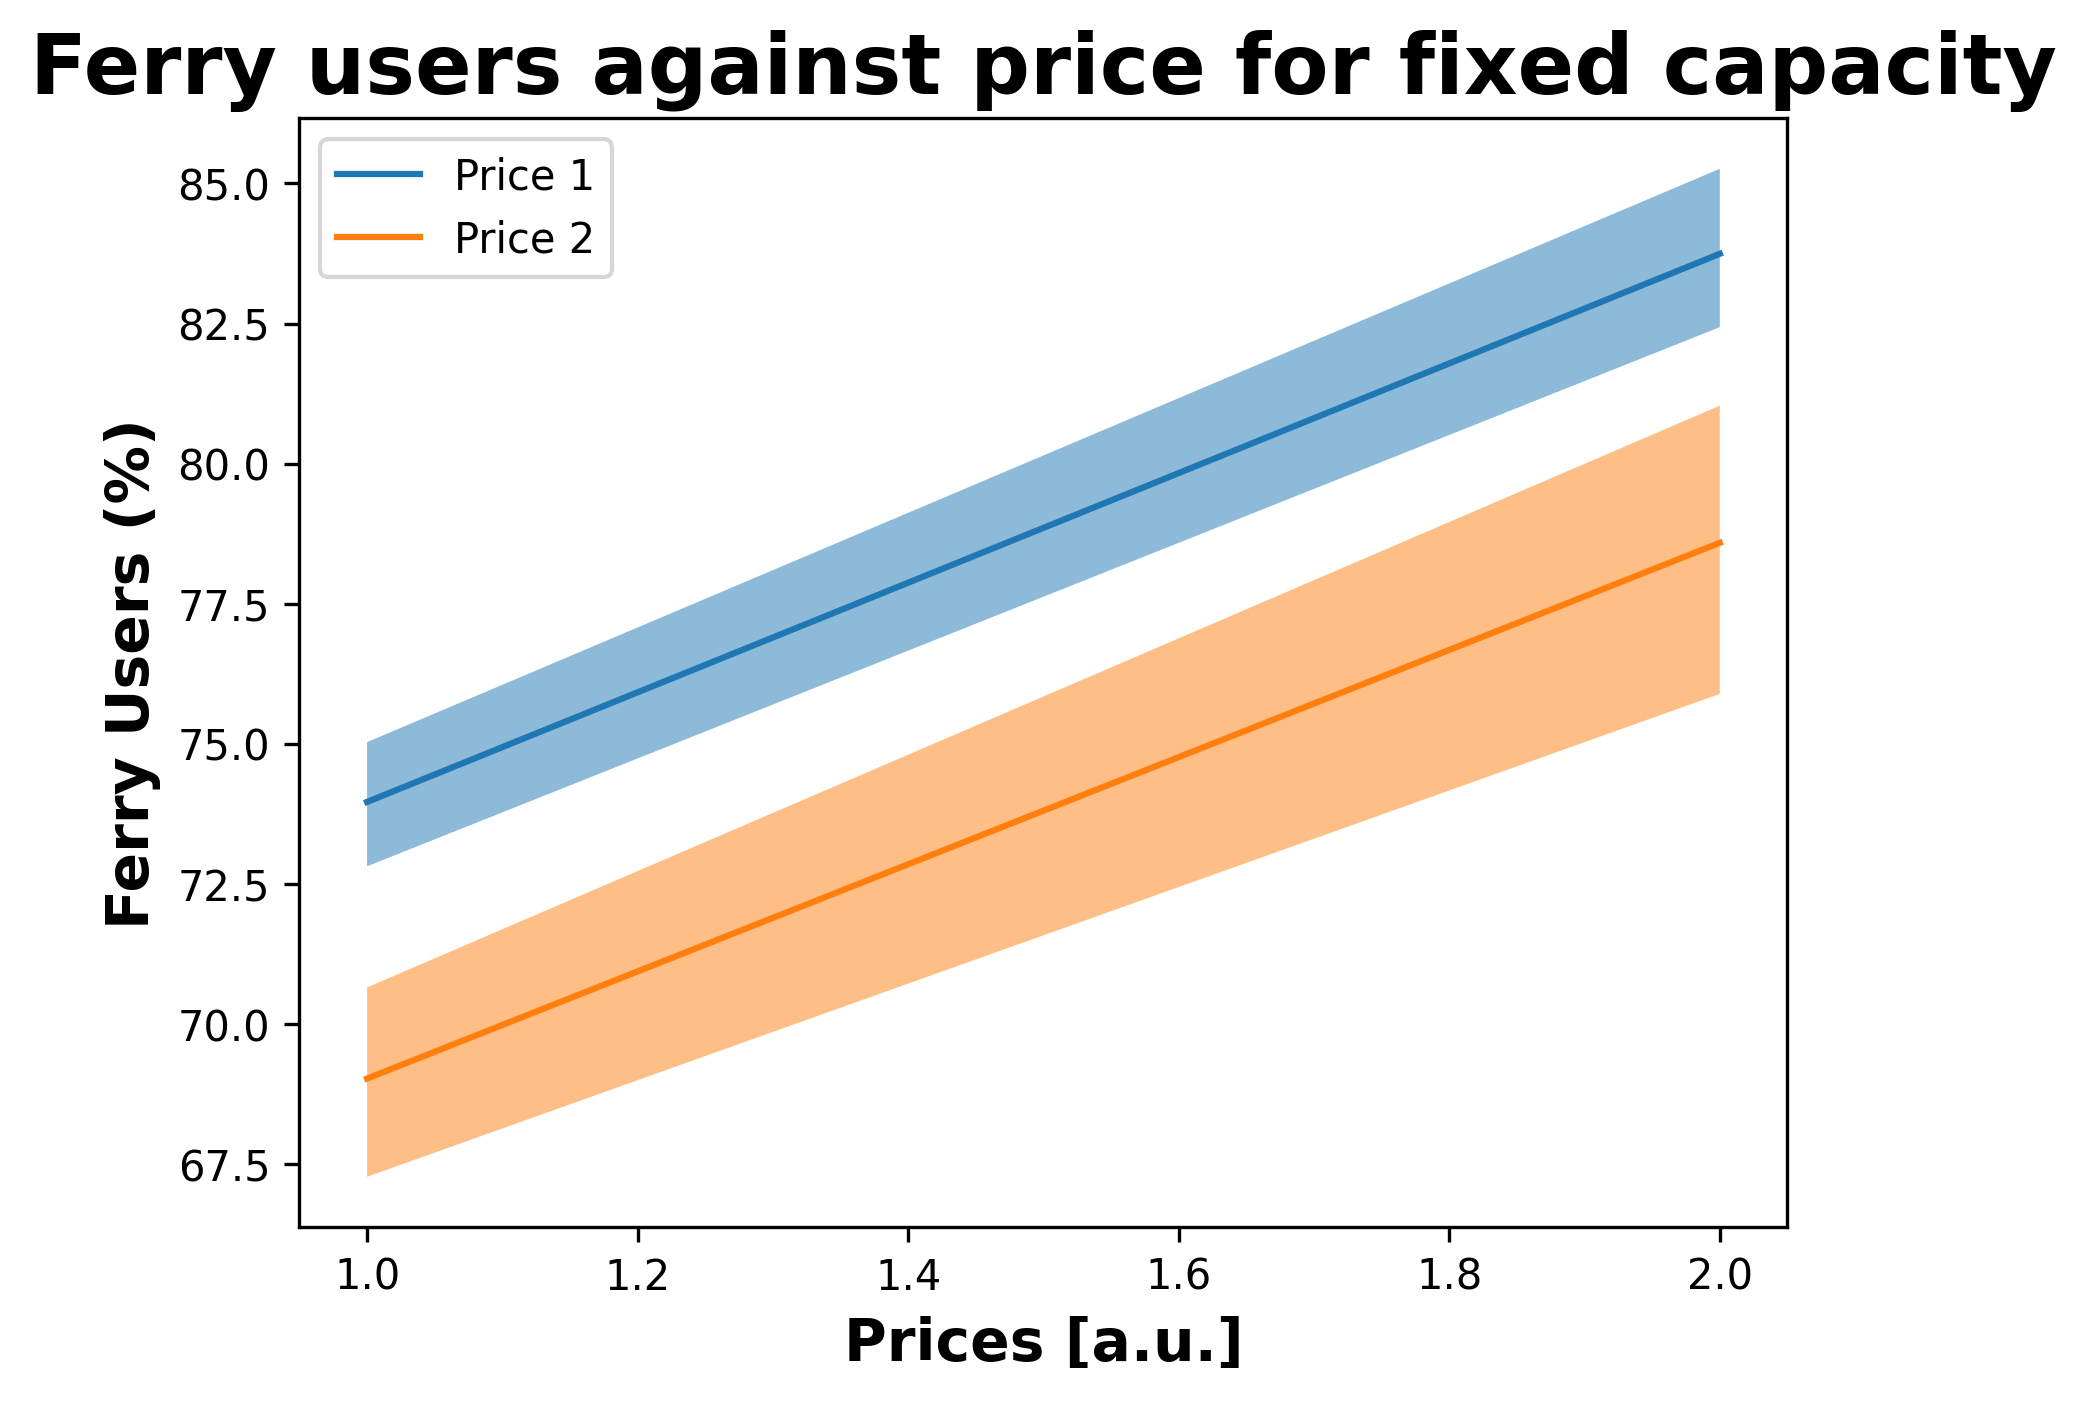

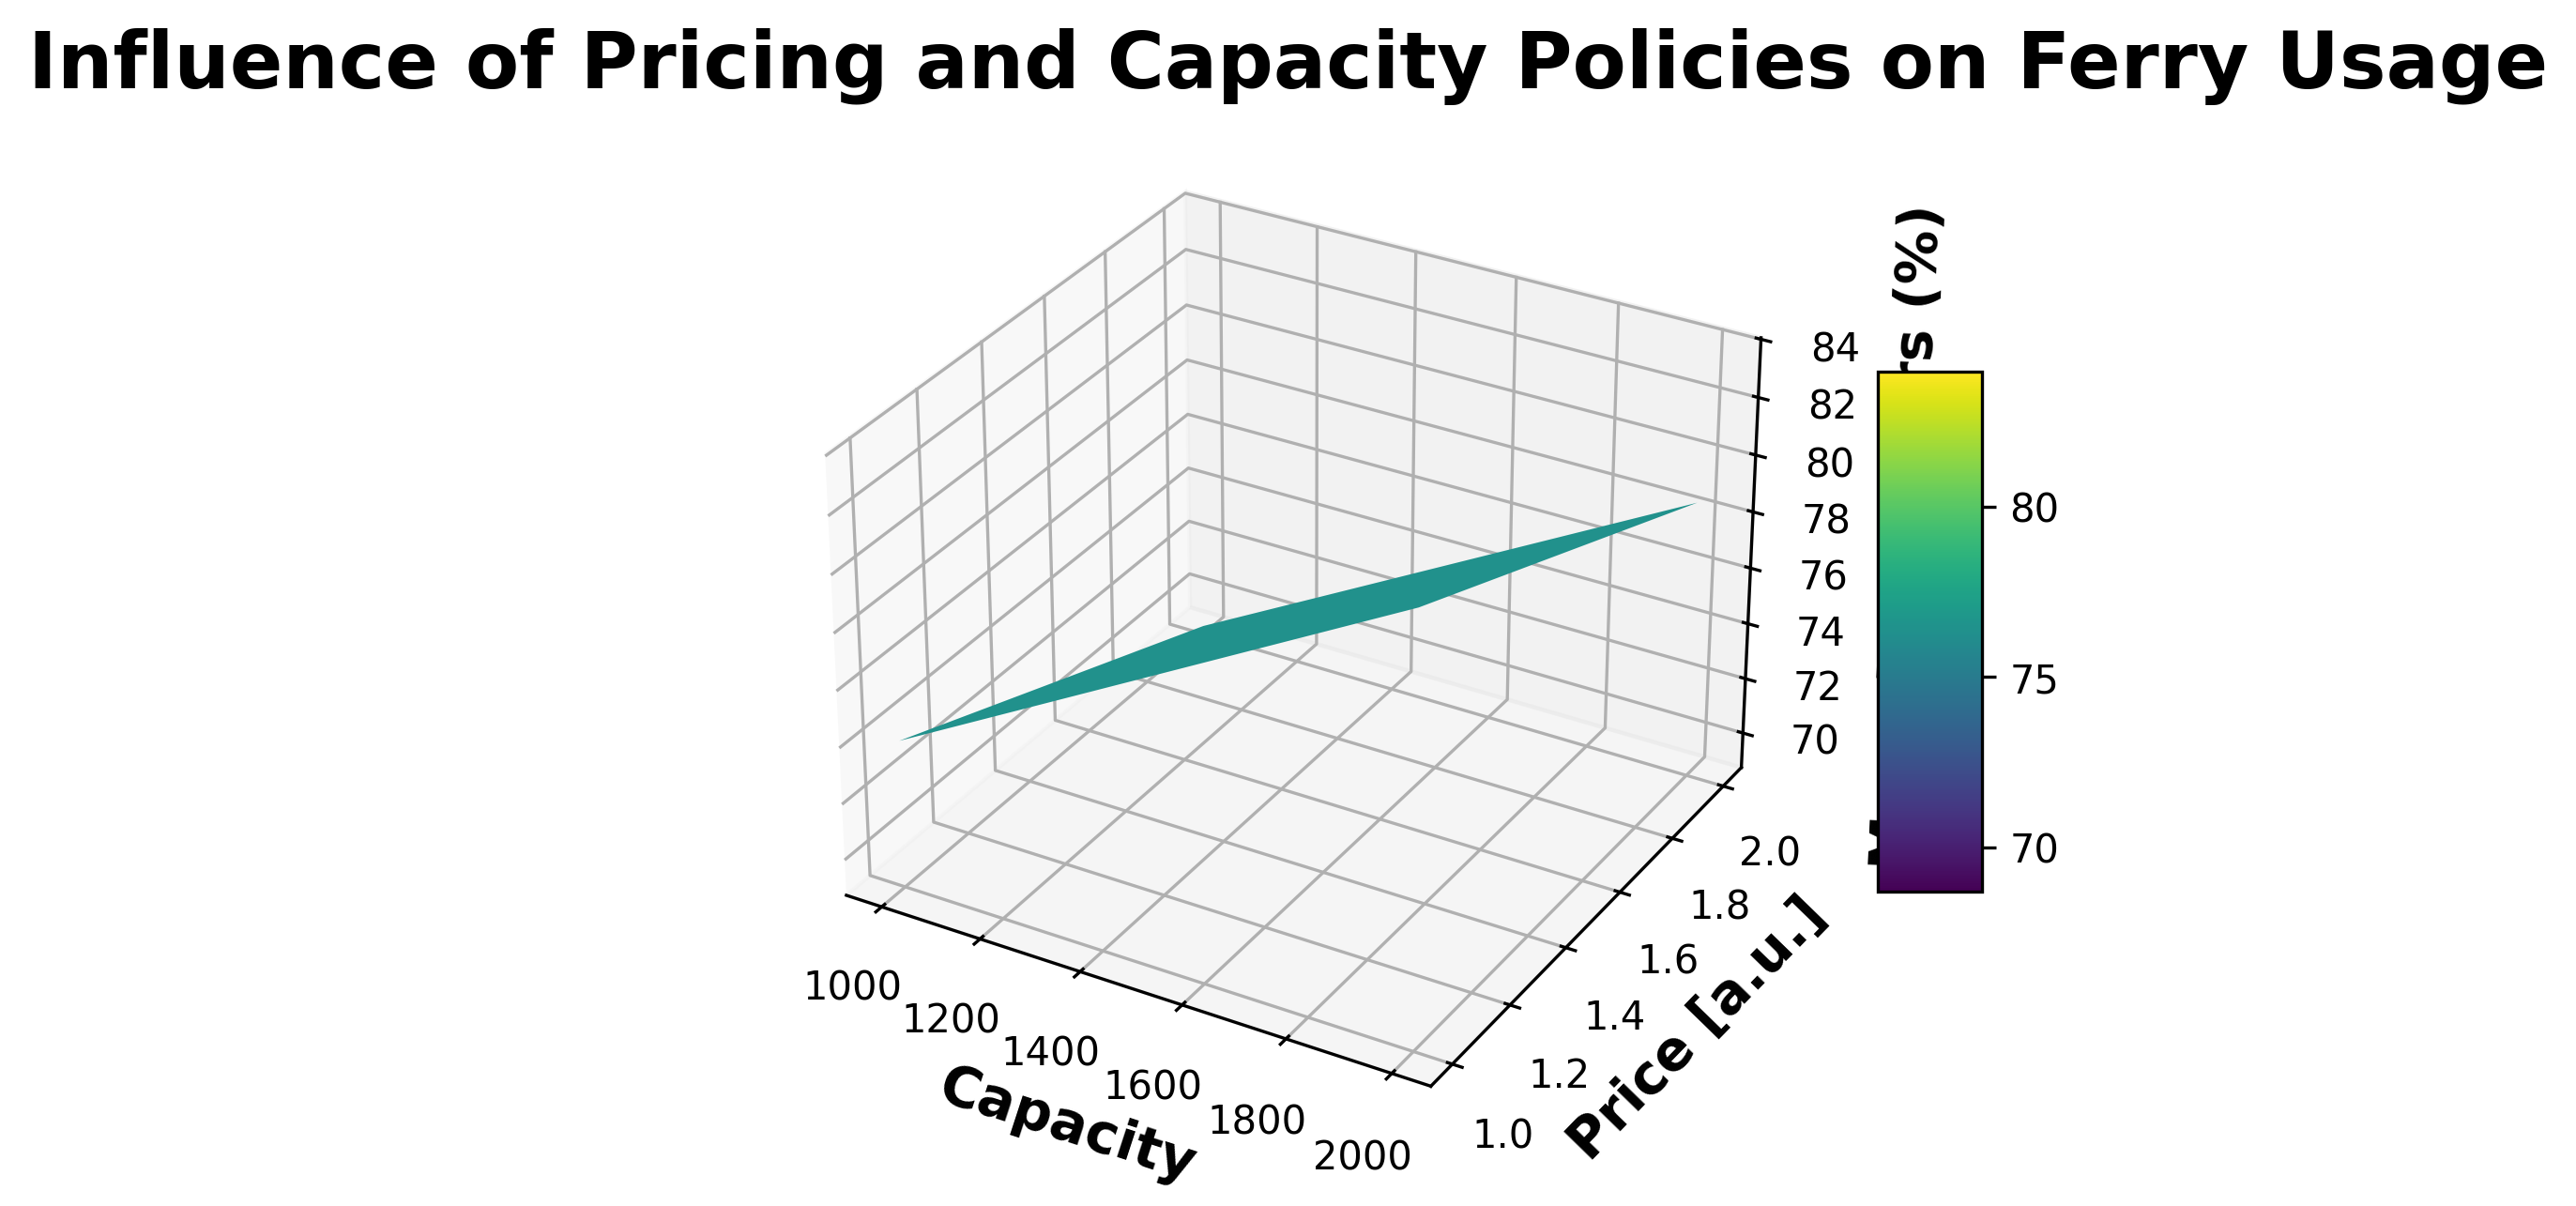

In [111]:
# Plotting ferry users over time for different capacities
plot_time_series([mean_of_all_runs[capacity_ix, price_ix] for price_ix in range(len(ferry_prices))],
                 [cis_of_all_runs[capacity_ix, price_ix] for price_ix in range(len(ferry_prices))],
                 'Ferry Users for Various Capacities',
                 'Ferry Users (%)',
                 filename='ferry_users_time_series.png')

# Plotting ferry users against price for a fixed capacity
plot_against_factors(ferry_prices, [mean_of_equilibrium[:, price_ix] for price_ix in range(len(ferry_prices))],
                     [cis_of_equilibrium[:, price_ix] for price_ix in range(len(ferry_prices))],
                     'Ferry users against price for fixed capacity',
                     'Prices [a.u.]', 'Ferry Users (%)',
                     filename='ferry_users_against_price.png')

# Plotting a 3D surface of ferry users
X, Y = np.meshgrid(capacities, ferry_prices)
Z = mean_of_equilibrium.T  # Adjusted mean data
plot_3d_surface(X, Y, Z, 'Influence of Pricing and Capacity Policies on Ferry Usage',
                'Capacity', 'Price [a.u.]', 'Mean Ferry Users (%)',
                filename='3d_surface_ferry_users.png')

In [69]:
# prices = np.arange(1, 11, 1)
# capacities = np.arange(200, 2200, 200)

df_percentages = pd.read_csv('Data/percentages_ferry_users.csv')
df_mean = pd.read_csv('Data/mean.csv')
df_CI = pd.read_csv('Data/CI.csv')
df_mean_mean = pd.read_csv('Data/mean_mean.csv')
df_CI_mean = pd.read_csv('Data/CI_mean.csv')

# Get the original shapes
num_days = 100
num_prices = len(prices)
num_capacities = len(capacities)
runs = 2

# Reshape the data to their original shapes
percentages_ferry_users = df_percentages.values.reshape(num_capacities, num_prices, num_days, runs)
mean = df_mean.values.reshape(num_capacities, num_prices, num_days)
CI = df_CI.values.reshape(num_capacities, num_prices, num_days, 2)
mean_mean = df_mean_mean.values.reshape(num_capacities, num_prices)
CI_mean = df_CI_mean.values.reshape(num_capacities, num_prices, 2)

# Global Sensitivity Analysis

In [18]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from tqdm import tqdm

# Define the model inputs
problem = {
    'num_vars': 2,
    'names': ['capacity', 'ferry_base_price'],
    'bounds': [[200, 201], [1, 2]]
}

In [19]:
# Generate samples
param_values = saltelli.sample(problem, 256)

/var/folders/kv/mqy3j2450dl54w7j2_tlr6p80000gn/T/ipykernel_2230/1614017064.py:2: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 256)


In [20]:
def run_simulation(islands, capacity, ferry_base_price):
    """
    Run the simulation with specified parameters.
    """
    simulation = Simulation(
        islands=islands,
        capacity=capacity,
        ferry_base_price=ferry_base_price,
    )
    simulation.run()
    return simulation.return_percentage_ferry_users()

def run_experiment(param_values, islands, runs):
    """
    Run the experiment over sampled parameters, displaying progress with a tqdm bar.
    """
    # Initialize results array
    results = []

    # Total iterations for the progress bar
    total_iterations = len(param_values) * runs

    # Setup tqdm progress bar
    with tqdm(total=total_iterations, desc="Running Simulations", unit="sim") as pbar:
        for params in param_values:
            capacity = int(params[0])
            ferry_base_price = params[1]
            # num_days = int(params[2])
            
            # Run the simulation multiple times for each parameter set
            for _ in range(runs):
                result = run_simulation(islands, capacity, ferry_base_price)
                results.append(result)
                pbar.update(1)  # Update the progress bar after each simulation

    return results

# Example usage assuming `param_values`, `problem`, and `islands` are predefined
results = run_experiment(param_values, islands=['A', 'B'], runs=1)

Running Simulations: 100%|██████████| 1536/1536 [48:52<00:00,  1.91s/sim]


In [26]:
# Convert the results to a suitable format
Y = np.array(results).flatten()

# Perform the Sobol sensitivity analysis
Si = sobol.analyze(problem, Y, print_to_console=True)

                        ST   ST_conf
capacity          0.118271  0.005172
ferry_base_price  1.272130  0.059460
                        S1   S1_conf
capacity         -0.013505  0.007266
ferry_base_price -0.039231  0.022935
                                    S2   S2_conf
(capacity, ferry_base_price)  1.142801  0.070855


In [23]:
# # Convert the results to a flat, one-dimensional array
# Y = np.array(results).flatten()  # Ensuring Y is flat if `results` is not nested

# # Perform the Sobol sensitivity analysis
# try:
#     Si = sobol.analyze(problem, Y, print_to_console=True)
# except ValueError as e:
#     print("Error in Sobol analysis:", e)
#     print("Check the shape and size of Y:", Y.shape)
#     print("Expected size:", len(param_values))

                        ST   ST_conf
capacity          0.118271  0.004503
ferry_base_price  1.272130  0.059674
                        S1   S1_conf
capacity         -0.013505  0.006633
ferry_base_price -0.039231  0.019179
                                    S2  S2_conf
(capacity, ferry_base_price)  1.142801  0.06448


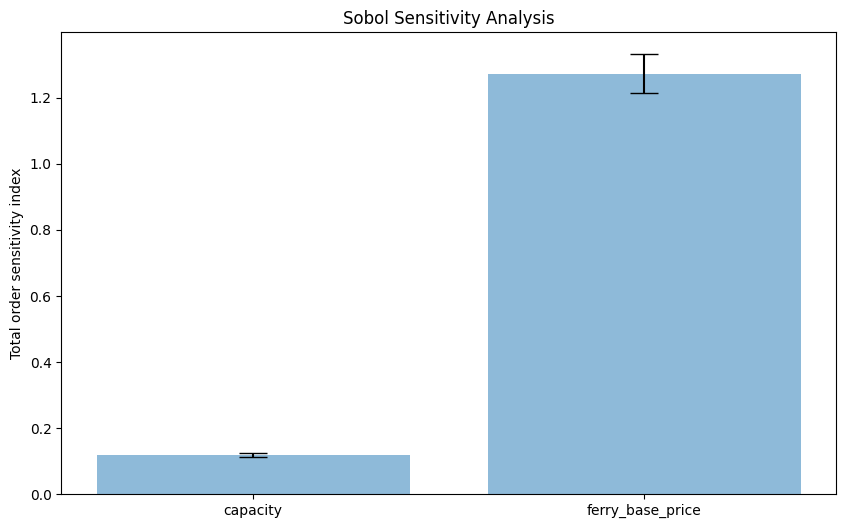

In [30]:
# Plotting the results
def plot_sensitivity_indices(Si, parameter_names, title='Sobol Sensitivity Analysis'):
    """
    Plot the Sobol sensitivity indices.
    """
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))

    # First order
    ax.bar(parameter_names, Si['ST'], yerr=Si['ST_conf'], align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Total order sensitivity index')
    ax.set_title(title)
    plt.show()

# Plot the sensitivity indices
plot_sensitivity_indices(Si, problem['names'])